In [1]:
import numpy as np

data = np.load('data_celeba.npz')
list(data)

['X_data', 'Y_data']

In [2]:
X = data['X_data']
y = data['Y_data']
#X=data[list(data)[0]]; y=data[list(data)[1]]
np.shape(X), np.shape(y)

((2000, 72, 59, 3), (2000, 2))

In [3]:
### y값은 성별과 웃음여부로 구성되어 있음.
y_gender = y[:, 0]
y_smile = y[:, 1]

성별:여(0)남(1)  / 웃음여부:웃음x(0)/웃음(1)  


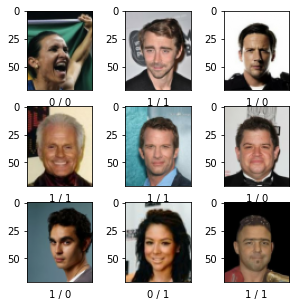

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5, 5))
print('성별:여(0)남(1)  / 웃음여부:웃음x(0)/웃음(1)  ')
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    #plt.yticks([])
    plt.imshow(X[i])

    plt.xlabel(str(y_gender[i]) + ' / ' + str(y_smile[i]))
plt.show()

---x값---


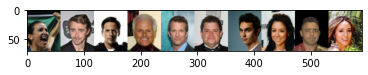

---y value----
[0 1 1 1 1 1 1 0 1 0] [0 1 0 1 1 0 0 1 1 1]


In [5]:
## 추가

# 5개의 이미지를 수평으로 나란히 출력

print('---x값---')
plt.imshow(np.hstack(X[:10]))
plt.show()

print('---y value----')
print(y_gender[:10], y_smile[:10])

In [7]:
# 추가
# 0~1값만 나오면 이미 스케일링 된 잘
np.min(X), np.max(X)

(0.0, 1.0)

In [8]:
# 생략가능, 이 작업 두번 하면 값 없어짐
# # 평균과 표준편차는 채널별로 구해줍니다.
# x_mean = np.mean(x_train, axis = (0, 1, 2))
# x_std = np.std(x_train, axis = (0, 1, 2))

# x_train = (x_train - x_mean) / x_std
# x_test = (x_test - x_mean) / x_std

In [9]:
## 성별만 갖고 작업해보고자함. x,y데이터셋 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X,
                                                  y_gender,
                                                  test_size=0.3,
                                                  random_state=777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [11]:
# 원자료의 편향여부확인
print(np.unique(y_gender, return_counts=True))

(array([0, 1], dtype=int8), array([1006,  994], dtype=int64))


In [15]:
# 과연 y데이터의 분할은 편향없이 잘 되었나를 확인해야 겠죠.
# => 훈련(트레이닝)과 테스트자료에 0과 1의 값의 분포가 비슷한가?
#결과물은 트레이닝의 y의 0값이 00개  1의값이 00개
#결과물은 테스트의 y의 0값이 00개 1의값이 00개

# [방법1]
import collections, numpy

print(collections.Counter(y_train))
print(collections.Counter(y_val))

Counter({0: 726, 1: 674})
Counter({1: 320, 0: 280})


In [16]:
# [방법2]
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))

(array([0, 1], dtype=int8), array([726, 674], dtype=int64))
(array([0, 1], dtype=int8), array([280, 320], dtype=int64))


In [ ]:
## 신경망 학습

In [18]:
#  순차신경망으로 구성해봄
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(
    Conv2D(filters=32,
           kernel_size=3,
           padding='same',
           activation='relu',
           input_shape=(72, 59, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2개의 출력을 가지는 신경망

In [19]:
model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
### 미션,  에포크별로  모델 저장하며, 일정step동안 모델의 성능이 나아지지 않을때 작업을 종료하도록 함.
### 참고: 모두의 딥러닝3  챕터14 참고, https://github.com/gilbutITbook/080324/blob/master/ch14.ipynb

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/30
44/44 [==============================] - 5s 123ms/step - loss: 0.5229 - acc: 0.7464 - val_loss: 0.5046 - val_acc: 0.7433
Epoch 2/30
44/44 [==============================] - 5s 122ms/step - loss: 0.4769 - acc: 0.7764 - val_loss: 0.5694 - val_acc: 0.6883
Epoch 3/30
44/44 [==============================] - 5s 121ms/step - loss: 0.4442 - acc: 0.7879 - val_loss: 0.4677 - val_acc: 0.7767
Epoch 4/30
44/44 [==============================] - 5s 122ms/step - loss: 0.4134 - acc: 0.8121 - val_loss: 0.4515 - val_acc: 0.7883
Epoch 5/30
44/44 [==============================] - 7s 156ms/step - loss: 0.3901 - acc: 0.8214 - val_loss: 0.4266 - val_acc: 0.7933
Epoch 6/30
44/44 [==============================] - 7s 169ms/step - loss: 0.3584 - acc: 0.8479 - val_loss: 0.4127 - val_acc: 0.8033
Epoch 7/30
44/44 [==============================] - 8s 173ms/step - loss: 0.3364 - acc: 0.8557 - val_loss: 0.4132 - val_acc: 0.7950
Epoch 8/30
44/44 [==============================] - 7s 167ms/step - loss: 0.

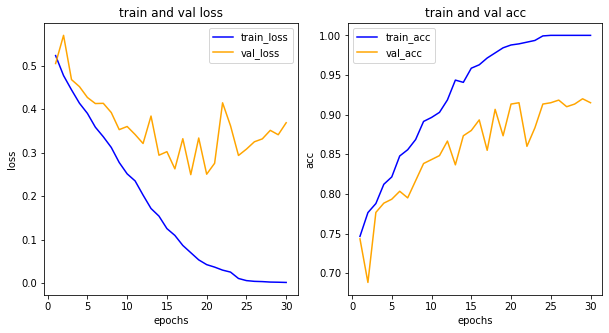

In [23]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [24]:
### 규제르 추가하여 작업해봄
## BatchNormalization 에 대하여  조사해보세요.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(
    Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(72, 59, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/5
44/44 [==============================] - 7s 159ms/step - loss: 0.5433 - acc: 0.7557 - val_loss: 0.7100 - val_acc: 0.4667
Epoch 2/5
44/44 [==============================] - 7s 157ms/step - loss: 0.1593 - acc: 0.9450 - val_loss: 0.7268 - val_acc: 0.4667
Epoch 3/5
44/44 [==============================] - 7s 171ms/step - loss: 0.0702 - acc: 0.9871 - val_loss: 0.6687 - val_acc: 0.5233
Epoch 4/5
44/44 [==============================] - 9s 211ms/step - loss: 0.0456 - acc: 0.9921 - val_loss: 0.6217 - val_acc: 0.7017
Epoch 5/5
44/44 [==============================] - 9s 211ms/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.5678 - val_acc: 0.7433


1/1 [==============================] - 0s 98ms/step
---x테스트---


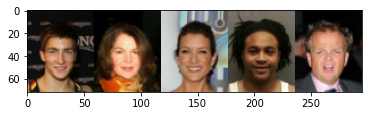

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
1 male
1 male
0 female
1 male


In [25]:
# 테스트데이터셋

y_pred = model.predict(x_val[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_val[:5]))
plt.show()

print('---y test value----')
print(y_val[:5])

class_names = ['female', 'male']
print('---y 예측값 value')
for i in y_pred:
    print(np.argmax(i), class_names[np.argmax(i)])

In [26]:
# y_val 또는 y_test사진셋이 아닌 한장의 사진으로 보겠습니다.
# model.predict(x_val[0]) 에러
model.predict(x_val[0:1])  # 텐서 모델은 4개의 dim이어야 함.
np.shape(x_val[0]), np.shape(x_val[0:1])

1/1 [==============================] - 0s 15ms/step


((72, 59, 3), (1, 72, 59, 3))

In [22]:
# 사진을 불러와서 모델 예측을 하려면 이 작업에서 필요한 전처리는 무엇일까요?
# 1. 리사이즈 (높이가 72, 너비가 59)
# 2. 반드시 3채널이어야함.(컬러야함)   => 72,59,3
# 3. 스케일링 0~1사이값으로, 제공된 npz의 스케일링 방법을 모르기때문에 이 부분은 스케일링 한 사람만 정확하게 할 수 있음.
#   => 여기서는 그냥 255로 나눈값임.
# 4. 텐서입력 shape로 변경해야함.  => (72,59,3) ==> (1,72,59,3)

# from PIL import Image
# for i in range(1,6):
#     img=Image.open('얼굴' + str(i) + '.jpg')
#     img=img.resize((59,72))   # PIL에서는 너비, 높이로 나옴.  텐서input은 높이,너비임
#   #print(np.shape(img))
#     imgArr=np.array(img)/255
#   #print(np.shape(imgArr))
#     newX=imgArr.reshape(1,72,59,3)
#   #print(np.shape(newX))
#     print(class_names[np.argmax(model.predict(newX))])
#     plt.imshow(img)
#     plt.show()